## Final Project Submission

Please fill out:
* Student name: Arinze Iwunze 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
from scipy import stats
sns.set_style('ticks')

In [2]:
kc = pd.read_csv('kc_house_data.csv')

In [3]:
kc.shape

(21597, 21)

In [4]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
kc = kc.dropna()

In [10]:
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
kc['waterfront'].unique()

array([0., 1.])

In [12]:
kc['yr_renovated'] = kc['yr_renovated'].fillna(value=kc.yr_built)

In [13]:
kc.yr_renovated

1        1991.0
3           0.0
4           0.0
5           0.0
6           0.0
          ...  
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: yr_renovated, Length: 15762, dtype: float64

In [14]:
kc.view.value_counts()

0.0    14241
2.0      688
3.0      348
1.0      245
4.0      240
Name: view, dtype: int64

In [15]:
kc = kc.dropna(subset=['view'])

In [16]:
kc.view.isna().sum()

0

In [17]:
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
kc.sqft_living.unique()

array([ 2570,  1960,  1680,  5420,  1715,  1780,  1890,  1160,  1370,
        1810,  2950,  1600,  1200,  1250,  1620,  3050,  2270,  2450,
        1710,  1400,  2320,  1190,  2330,  1090,  2060,  2300,  1660,
        2360,  1220,  2620,  4220,  3595,  1570,  1280,   990,  2290,
        2753,  3150,  1980,  2730,  2420,  1850,  1260,  1540,  2770,
        2240,  3200,  4770,  2750,  1790,  3430,  1410,  3450,  2350,
        1900,  2020,   960,  2140,  2660,  3520,  1580,  3300,  2070,
        2190,  2920,  1210,  1670,  1240,  3140,  2030,  2080,  1590,
         880,  1610,  2400,   770,  2910,  1060,  2010,  3950,  1110,
        3670,  2550,  2260,  1430,  1360,  5180,   700,  1180,  3960,
        2640,  1270,  1760,  3400,  1910,  1340,  2680,  1560,  3880,
        2590,  1120,  1970,  1950,  2380,  1050,  3130,  4090,  1490,
        2230,  2180,  1690,  1350,  1940,  1010,  1300,   910,  2440,
         900,  2714,  1720,   850,  2250,  3900,  1320,  2760,  1750,
        2220,  1480,

In [19]:
kc.sqft_basement = kc.sqft_basement.replace(to_replace='?', value=0.0)

In [20]:
kc.sqft_basement.unique()

array(['400.0', '910.0', '0.0', '1530.0', 0.0, '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

In [21]:
kc.view = kc.view.astype("int64")
#kc.waterfront = kc.waterfront.astype("bool")
kc.sqft_basement = kc.sqft_basement.astype("float64")
kc.yr_renovated = kc.yr_renovated.astype('int64')
kc.zipcode = kc.zipcode.astype('str')
kc.condition = kc.condition.astype('int64')
kc.grade = kc.grade.astype('int64')

In [22]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null int64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null float64
yr_built         15762 non-null int64
yr_renovated     15762 non-null int64
zipcode          15762 non-null object
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 2.6+ MB


In [23]:
kc.date = pd.to_datetime(kc.date, format='%m/%d/%Y')

In [24]:
kc.date.head()

1   2014-12-09
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
Name: date, dtype: datetime64[ns]

In [25]:
kc.sqft_living15.unique()

array([1690, 1360, 1800, 4760, 2238, 1780, 2390, 1330, 1370, 2140, 1890,
       1610, 1060, 1280, 1400, 4110, 2240, 2200, 1030, 1860, 2630, 2580,
       1390, 1460, 1570, 2020, 1590, 2160, 1730, 1290, 2620, 2410, 3625,
       1580, 1340, 1228, 2680,  970, 1190, 1990, 1480, 2730, 2690, 2270,
       1440, 2221, 3390, 3530, 1640, 1510, 1940, 3240, 1130, 3350, 2350,
       1870, 1720, 1850, 1980, 2520, 1350, 1950, 1750, 1160, 1650, 2550,
       2570, 2370, 1240, 1270, 2990, 2500, 1380, 1540, 2090, 1620, 2340,
       1710, 2700, 3060, 1420, 2060, 2480, 1170, 2230, 2840, 1450, 1500,
       3160, 1010, 2640, 1200, 3400, 2110, 1830, 2920, 1070, 3740, 2260,
       1670, 1410, 1050, 2540, 2190, 1230, 1900, 2330, 1560, 2030, 1680,
       1430, 2750, 1250, 2590, 2130, 1100, 1320, 2120, 3070, 1910, 2080,
       1960, 2250, 2280, 1150, 3430, 2070, 2600,  830, 1260, 3120, 1630,
       1550, 1600, 2380, 2653, 3050, 3920, 2300, 2310, 1520, 2320, 3150,
       4550, 2510, 1740, 1660, 2880, 3860, 2150, 13

In [26]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [27]:
kc.waterfront.isna()

1        False
3        False
4        False
5        False
6        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Name: waterfront, Length: 15762, dtype: bool

In [28]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
kc = kc.drop('id', axis = 1)

In [30]:
kc['condition'] = kc['condition'].astype('float64')
kc['grade'] = kc['grade'].astype('float64')

In [31]:
kc['total_sqft'] = kc['sqft_living'] + kc['sqft_lot']
kc['total_sqft_in'] = kc['sqft_above'] + kc['sqft_basement']

In [32]:
kc['yr_sold'] = kc['date'].dt.year
kc['age_sold'] = kc['yr_sold'] - kc['yr_built']
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,...,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,...,1971.111217,82.440236,47.559177,-122.213520,1990.219579,12900.415556,1.736533e+04,2078.421774,2014.321469,43.210253
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,...,29.336823,397.212626,0.138629,0.140706,684.142495,27977.230059,4.198454e+04,918.292373,0.467055,29.338710
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1900.000000,0.000000,47.155900,-122.519000,399.000000,659.000000,1.452000e+03,370.000000,2014.000000,-1.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1952.000000,0.000000,47.469200,-122.328000,1490.000000,5100.000000,7.056250e+03,1420.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,47.571000,-122.229000,1846.000000,7620.000000,9.576000e+03,1910.000000,2014.000000,39.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,47.677400,-122.124000,2370.000000,10107.500000,1.302200e+04,2550.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.652659e+06,13540.000000,2015.000000,115.000000


In [33]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 24 columns):
date             15762 non-null datetime64[ns]
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null int64
condition        15762 non-null float64
grade            15762 non-null float64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null float64
yr_built         15762 non-null int64
yr_renovated     15762 non-null int64
zipcode          15762 non-null object
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
total_sqft       15762 non-null int64
total_sqft_in    15762 non-null float64
yr_sold          15762 no

In [34]:
kc['age'] = 2020-kc['yr_built']

In [35]:
kc.waterfront.dtype

dtype('float64')

Making a new column describing if a column has a basement or not

In [36]:
#kc['basementYN'].dtype

In [37]:
kc['basement'] = kc['sqft_basement']!=0

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [39]:
seattle_lat, seattle_long = 47.608013, -122.335167

In [40]:
import folium
KC_map = folium.Map(location=[seattle_lat,seattle_long], zoom_start=11)

In [41]:
import numpy as np
 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [42]:
kc['distance_from_city'] = haversine_vectorize(seattle_long,seattle_lat,kc['long'],kc['lat'])

In [43]:
kc['distance_from_city']

1        12.613856
3        10.617501
4        21.759524
5        25.295727
6        33.155745
           ...    
21591     6.501158
21592    10.176637
21593    10.999537
21594     3.103628
21596     3.120019
Name: distance_from_city, Length: 15762, dtype: float64

In [44]:
airport_lat,airport_lon = 47.443546, -122.301659

In [45]:
kc['distance_from_airport'] = haversine_vectorize(airport_lon,airport_lat, kc['long'], kc['lat'])

In [46]:
kc['distance_from_airport']

1        30.859494
3        10.988905
4        27.230991
5        32.449837
6        14.995397
           ...    
21591    16.906717
21592    28.614456
21593     8.730896
21594    16.764856
21596    16.731520
Name: distance_from_airport, Length: 15762, dtype: float64

In [47]:
kc['age_sold'].values[kc['age_sold'].values <= 0] = 0.1

## Outliers

Opon investigating for outliers I was able to find some in 9 columns and I removed them by using the interquartile range of the columns to detect the lower and upper bounds and then removing all points outside of this range

In [48]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'total_sqft_in', 'yr_sold',
       'age_sold', 'age', 'basement', 'distance_from_city',
       'distance_from_airport'],
      dtype='object')

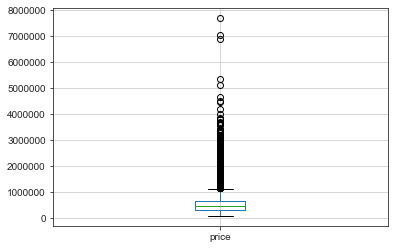

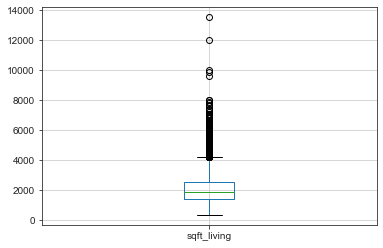

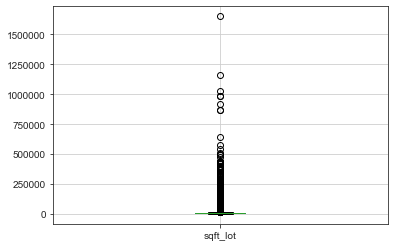

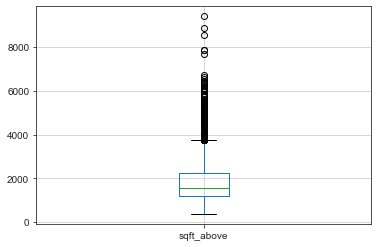

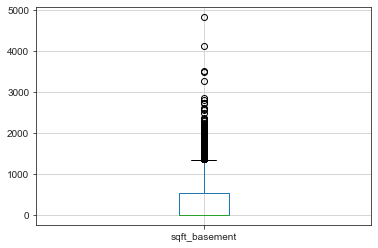

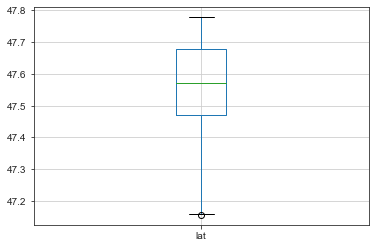

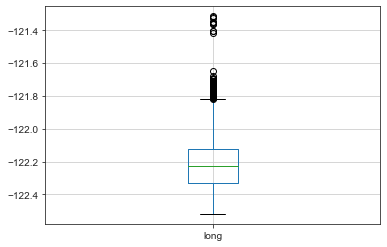

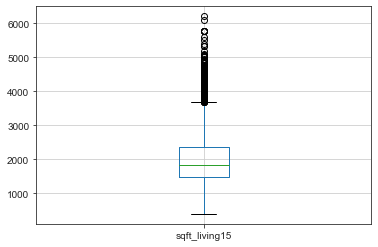

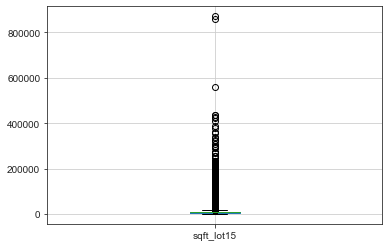

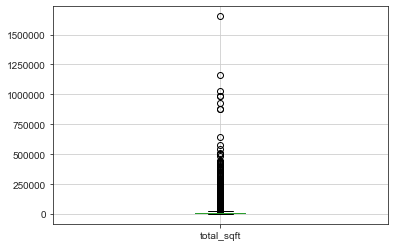

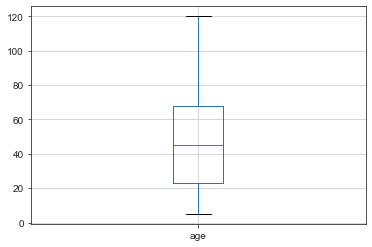

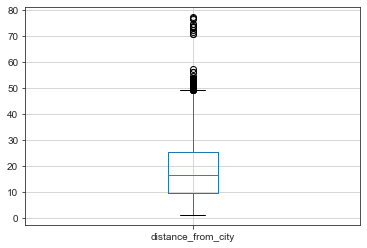

In [49]:
kt = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft',  
        'age', 'distance_from_city']

for column in kt:
    plt.figure()
    kc.boxplot([column])

In [50]:
def remove_outlier(kc, col, threshold=4):
    q1 = kc[col].quantile(0.25)
    q3 = kc[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound  = q1 - (2 * iqr)
    
    upper_bound = q3 + (2 * iqr)
    
    kc_wo = kc.loc[(kc[col] > lower_bound) & (kc[col] < upper_bound)]
    
    return kc_wo

In [51]:

kc = remove_outlier(kc, 'sqft_living')
kc = remove_outlier(kc, 'total_sqft')
kc = remove_outlier(kc, 'sqft_living15')
kc = remove_outlier(kc, 'sqft_lot')
kc = remove_outlier(kc, 'sqft_lot15')
#kc = remove_outlier(kc, 'total_sqft_in')
kc = remove_outlier(kc, 'bedrooms')
kc = remove_outlier(kc, 'lat')
kc = remove_outlier(kc, 'long')
kc = remove_outlier(kc, 'sqft_basement')
kc = remove_outlier(kc, 'distance_from_city')
kc = remove_outlier(kc, 'price')


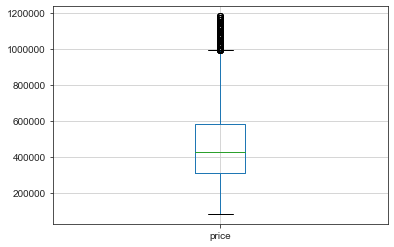

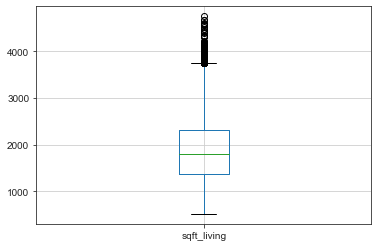

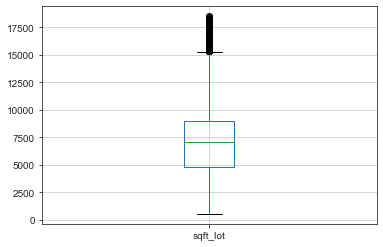

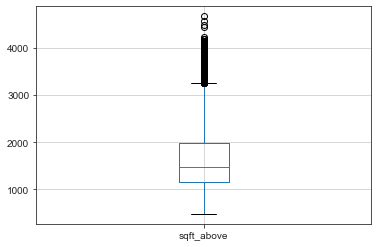

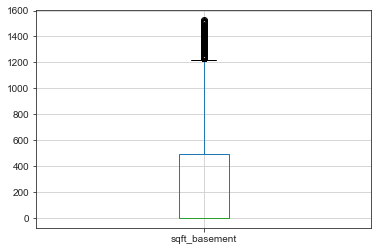

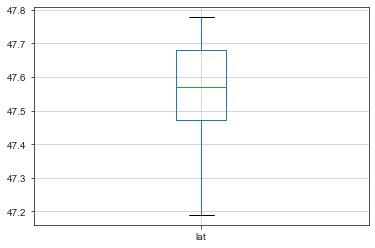

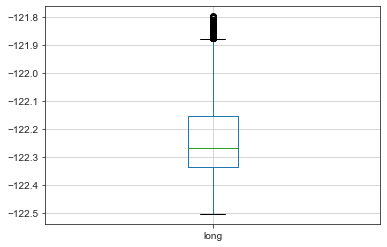

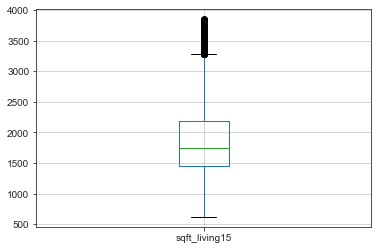

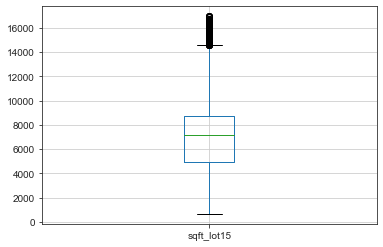

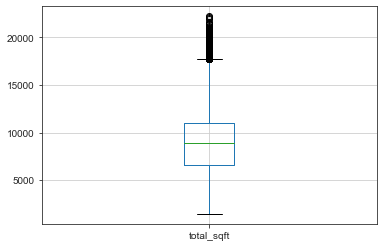

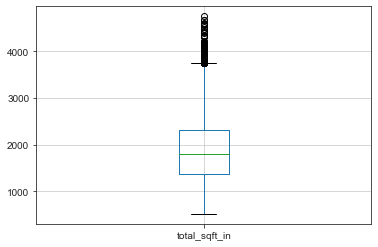

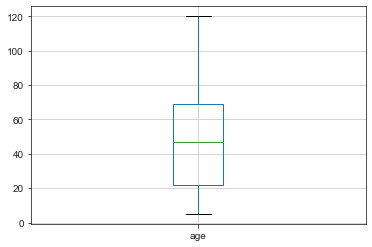

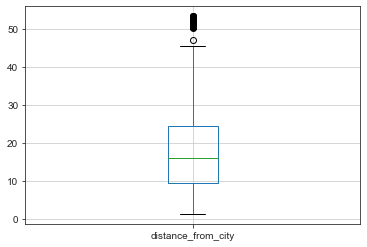

In [52]:
kt = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft', 'total_sqft_in', 
        'age', 'distance_from_city']

for column in kt:
    plt.figure()
    kc.boxplot([column])

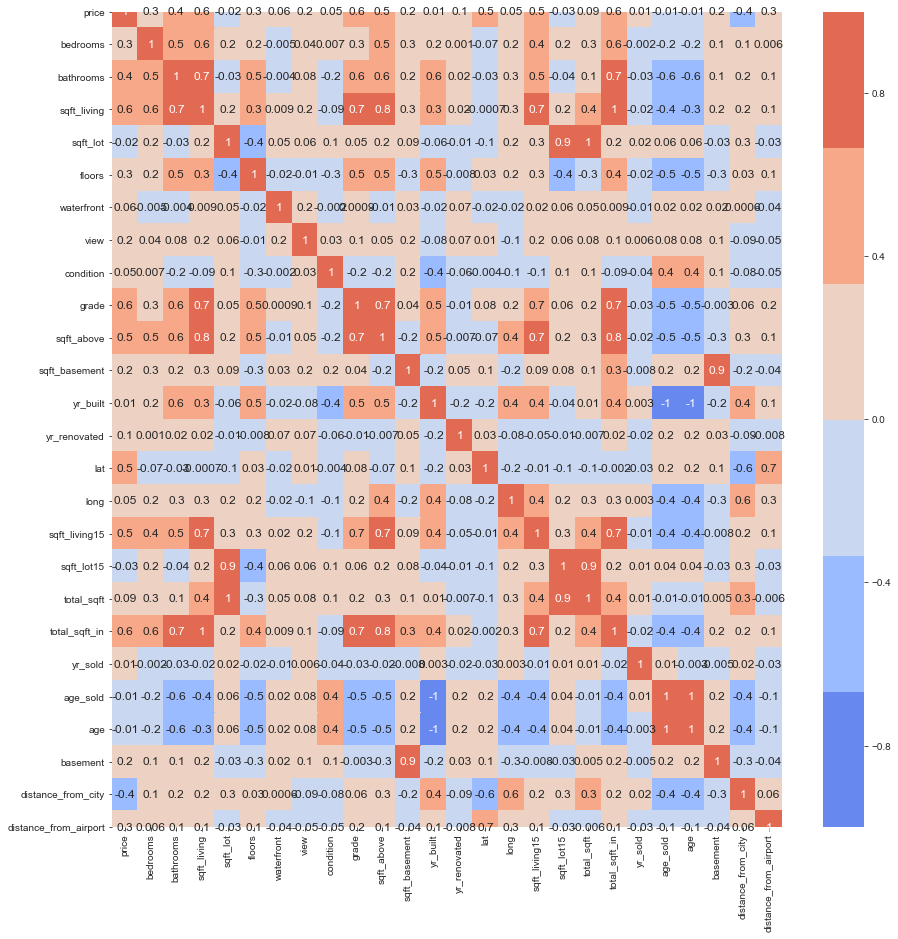

In [53]:
correlation = kc.corr()

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, annot=True, annot_kws = {'size':12}, linewidths=0, cmap=sns.color_palette('coolwarm'), vmin=-1, fmt = '.1g')

sqft_living, grade, and total_sqft_in columns all have high correlations to the price column

In [54]:
kc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold,age,basement,distance_from_city,distance_from_airport
price,1.000000,0.271820,0.406661,0.583673,-0.021968,0.260410,0.058915,0.244170,0.046380,0.599137,...,0.517468,-0.029094,0.091170,0.579948,0.011758,-0.009761,-0.009947,0.167848,-0.385371,0.305706
bedrooms,0.271820,1.000000,0.475634,0.613387,0.208058,0.154225,-0.004780,0.038711,0.006805,0.323894,...,0.415364,0.193547,0.313488,0.609020,-0.001517,-0.175434,-0.175426,0.122565,0.146125,0.006105
bathrooms,0.406661,0.475634,1.000000,0.695893,-0.031903,0.521058,-0.004465,0.075013,-0.158170,0.597514,...,0.529090,-0.036408,0.103321,0.693291,-0.025306,-0.562063,-0.561704,0.129137,0.162646,0.106791
sqft_living,0.583673,0.613387,0.695893,1.000000,0.211686,0.348333,0.008570,0.150143,-0.088484,0.680251,...,0.740569,0.194818,0.390998,0.995370,-0.022152,-0.350254,-0.349932,0.165019,0.156433,0.105249
sqft_lot,-0.021968,0.208058,-0.031903,0.211686,1.000000,-0.363098,0.052788,0.055542,0.125045,0.052620,...,0.255514,0.875099,0.982302,0.209914,0.015789,0.056207,0.055975,-0.027895,0.323651,-0.027642
floors,0.260410,0.154225,0.521058,0.348333,-0.363098,1.000000,-0.015084,-0.014785,-0.287635,0.469671,...,0.269783,-0.368422,-0.275185,0.352030,-0.020371,-0.524263,-0.523989,-0.277367,0.031019,0.120758
waterfront,0.058915,-0.004780,-0.004465,0.008570,0.052788,-0.015084,1.000000,0.233534,-0.001962,0.000946,...,0.018087,0.058368,0.051354,0.008837,-0.010484,0.023114,0.023280,0.022987,0.000630,-0.037227
view,0.244170,0.038711,0.075013,0.150143,0.055542,-0.014785,0.233534,1.000000,0.034808,0.126116,...,0.179406,0.059256,0.081080,0.145742,0.005558,0.079473,0.079394,0.135608,-0.088345,-0.049012
condition,0.046380,0.006805,-0.158170,-0.088484,0.125045,-0.287635,-0.001962,0.034808,1.000000,-0.189411,...,-0.134773,0.135888,0.100801,-0.091306,-0.043181,0.378989,0.379694,0.117097,-0.075821,-0.053910
grade,0.599137,0.323894,0.597514,0.680251,0.052620,0.469671,0.000946,0.126116,-0.189411,1.000000,...,0.656093,0.057020,0.179921,0.679643,-0.026784,-0.486839,-0.486462,-0.002510,0.059880,0.159438


In [55]:
abs(kc.corr())>0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold,age,basement,distance_from_city,distance_from_airport
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [56]:
kc = kc.drop('sqft_living', axis=1)
kc = kc.drop('total_sqft_in', axis=1)
kc = kc.drop('sqft_lot15', axis=1)
kc = kc.drop('sqft_above', axis=1)

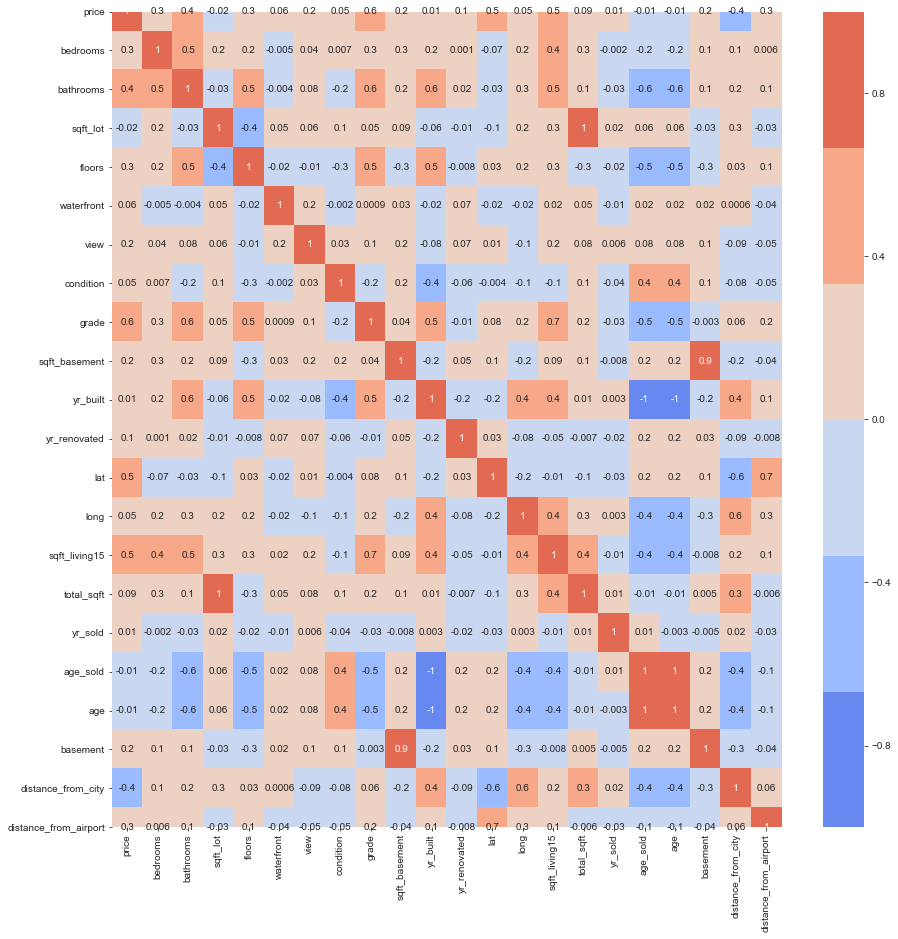

In [57]:
correlation = kc.corr()

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, cmap=sns.color_palette('coolwarm'), vmin=-1, fmt = '.1g')

In [58]:
#kc['waterfrontYN'] = np.where(kc['waterfront']==False, 0, 1)
kc['renovatedYN'] = np.where(kc['yr_renovated']==kc.yr_built, 0, 1).astype("float64")
kc['basementYN'] = np.where(kc['sqft_basement']>-0.65, 1, 0).astype("float64")


In [59]:
kc['waterfront']

1        0.0
3        0.0
4        0.0
6        0.0
8        0.0
        ... 
21591    0.0
21592    0.0
21593    0.0
21594    0.0
21596    0.0
Name: waterfront, Length: 12615, dtype: float64

In [60]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'total_sqft',
       'yr_sold', 'age_sold', 'age', 'basement', 'distance_from_city',
       'distance_from_airport', 'renovatedYN', 'basementYN'],
      dtype='object')

## Transformation

In [61]:
kc

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,total_sqft,yr_sold,age_sold,age,basement,distance_from_city,distance_from_airport,renovatedYN,basementYN
1,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0,3.0,7.0,...,1690,9812,2014,63,69,True,12.613856,30.859494,1.0,1.0
3,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0,5.0,7.0,...,1360,6960,2014,49,55,True,10.617501,10.988905,1.0,1.0
4,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0,3.0,8.0,...,1800,9760,2015,28,33,False,21.759524,27.230991,1.0,1.0
6,2014-06-27,257500.0,3,2.25,6819,2.0,0.0,0,3.0,7.0,...,2238,8534,2014,19,25,False,33.155745,14.995397,1.0,1.0
8,2015-04-15,229500.0,3,1.00,7470,1.0,0.0,0,3.0,7.0,...,1780,9250,2015,55,60,True,10.637006,8.088242,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1294,2.0,0.0,0,3.0,8.0,...,1330,2604,2015,7,12,True,6.501158,16.906717,1.0,1.0
21592,2014-05-21,360000.0,3,2.50,1131,3.0,0.0,0,3.0,8.0,...,1530,2661,2014,5,11,False,10.176637,28.614456,1.0,1.0
21593,2015-02-23,400000.0,4,2.50,5813,2.0,0.0,0,3.0,8.0,...,1830,8123,2015,1,6,False,10.999537,8.730896,1.0,1.0
21594,2014-06-23,402101.0,2,0.75,1350,2.0,0.0,0,3.0,7.0,...,1020,2370,2014,5,11,False,3.103628,16.764856,1.0,1.0


In [62]:
categoricals = ['bedrooms', 'bathrooms','floors','view','condition','grade','waterfront','basementYN', 'renovatedYN']

In [63]:
nominal = ['price','sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'total_sqft_in', 'yr_sold',
       'age_sold', 'age', 'distance_from_city',
       'distance_from_airport']

In [64]:
kc.sqft_basement.dtype

dtype('float64')

In [65]:
totransform = ['bathrooms','bedrooms','distance_from_city','sqft_lot']

In [66]:
nottransform = ['age','distance_from_airport','yr_renovated']

## Normalization


In [103]:
data_log = pd.DataFrame([])

for name in totransform:
    title = name + '_log'
    data_log[title] = kc[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return ((feature - feature.mean()) / feature.std())

data_log_norm = data_log.apply(normalize)
data_log_norm

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log
1,0.457581,-0.254957,-0.231035,0.278650
3,1.227894,0.902719,-0.494392,-0.347189
4,0.142199,-0.254957,0.602414,0.463625
6,0.457581,-0.254957,1.246185,0.176976
8,-1.713809,-0.254957,-0.491586,0.331016
...,...,...,...,...
21591,0.739700,-0.254957,-1.244180,-2.630692
21592,0.739700,-0.254957,-0.559216,-2.858140
21593,0.739700,0.902719,-0.440358,-0.092672
21594,-2.484123,-1.886610,-2.374402,-2.559120


In [104]:
'''for name in modeldata:
    title = name + '_log'
    data_log[title] = wf_houses[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

for name in modeldata:

kc.price = (kc.price - kc.price.mean()) / kc.price.std()
kc.sqft_lot = (kc.sqft_lot - kc.sqft_lot.mean()) / kc.sqft_lot.std()
kc.bedrooms = (kc.bedrooms - kc.bedrooms.mean()) / kc.bedrooms.std()
kc.bathrooms = (kc.bathrooms - kc.bathrooms.mean()) / kc.bathrooms.std()
kc.floors = (kc.floors - kc.floors.mean()) / kc.floors.std()
kc.sqft_above = (kc.sqft_above - kc.sqft_above.mean()) / kc.sqft_above.std()
kc.sqft_basement = (kc.sqft_basement - kc.sqft_basement.mean()) / kc.sqft_basement.std()
kc.sqft_living15 = (kc.sqft_living15 - kc.sqft_living15.mean()) / kc.sqft_living15.std()
kc.sqft_lot15 = (kc.sqft_lot15 - kc.sqft_lot15.mean()) / kc.sqft_lot15.std()
kc.total_sqft_in = (kc.total_sqft_in - kc.total_sqft_in.mean()) / kc.total_sqft_in.std()
kc.age_sold = (kc.age_sold - kc.age_sold.mean()) / kc.age_sold.std()
kc.age = (kc.age - kc.age.mean()) / kc.age.std()
kc.distance_from_airport = (kc.distance_from_airport - kc.distance_from_airport.mean()) / kc.sqft_lot15.std()
kc.distance_from_city = (kc.distance_from_city - kc.distance_from_city.mean()) / kc.sqft_lot15.std()

kc.head()'''

"for name in modeldata:\n    title = name + '_log'\n    data_log[title] = wf_houses[name].map(lambda x: np.log(x))    \ndata_log\n\ndef normalize(feature):\n    return (feature - feature.mean()) / feature.std()\n\ndata_log_norm = data_log.apply(normalize)\ndata_log_norm\n\nfor name in modeldata:\n\nkc.price = (kc.price - kc.price.mean()) / kc.price.std()\nkc.sqft_lot = (kc.sqft_lot - kc.sqft_lot.mean()) / kc.sqft_lot.std()\nkc.bedrooms = (kc.bedrooms - kc.bedrooms.mean()) / kc.bedrooms.std()\nkc.bathrooms = (kc.bathrooms - kc.bathrooms.mean()) / kc.bathrooms.std()\nkc.floors = (kc.floors - kc.floors.mean()) / kc.floors.std()\nkc.sqft_above = (kc.sqft_above - kc.sqft_above.mean()) / kc.sqft_above.std()\nkc.sqft_basement = (kc.sqft_basement - kc.sqft_basement.mean()) / kc.sqft_basement.std()\nkc.sqft_living15 = (kc.sqft_living15 - kc.sqft_living15.mean()) / kc.sqft_living15.std()\nkc.sqft_lot15 = (kc.sqft_lot15 - kc.sqft_lot15.mean()) / kc.sqft_lot15.std()\nkc.total_sqft_in = (kc.total_s

In [105]:
floor_dummies = pd.get_dummies(kc['floors'], prefix='floor', drop_first=True).fillna(0)
view_dummies = pd.get_dummies(kc['view'], prefix='view', drop_first=True).fillna(0)
cond_dummies = pd.get_dummies(kc['condition'], prefix='cond', drop_first=True).fillna(0)
grade_dummies = pd.get_dummies(kc['grade'], prefix='grade', drop_first=True).fillna(0)
#water_dummies = pd.get_dummies(kc['waterfront'], prefix='water', drop_first=True).fillna(0)
base_dummies = pd.get_dummies(kc['basement'], prefix='base', drop_first=True).fillna(0)

In [106]:
kcnew = pd.concat([kc.price, kc.waterfront,kc.renovatedYN, kc.total_sqft, kc.age, kc.basementYN, data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies],axis = 1)

In [144]:
kcnew.columns

Index(['price', 'waterfront', 'renovatedYN', 'basementYN', 'bathrooms_log',
       'bedrooms_log', 'distance_from_city_log', 'sqft_lot_log',
       'bedrooms_log_log', 'bathrooms_log_log', 'total_sqft_log', 'age_log',
       'distance_from_city_log_log', 'distance_from_airport_log',
       'waterfront_log', 'renovatedYN_log', 'basementYN_log', 'floor_1.5',
       'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5', 'view_1', 'view_2',
       'view_3', 'view_4', 'cond_2.0', 'cond_3.0', 'cond_4.0', 'cond_5.0',
       'grade_5.0', 'grade_6.0', 'grade_7.0', 'grade_8.0', 'grade_9.0',
       'grade_10.0', 'grade_11.0'],
      dtype='object')

In [145]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'total_sqft',
       'yr_sold', 'age_sold', 'age', 'basement', 'distance_from_city',
       'distance_from_airport', 'renovatedYN', 'basementYN'],
      dtype='object')

## Model 1

In [152]:
# Normalize all numeric columns using z-score
normalize = ['bedrooms', 'bathrooms', 'total_sqft', 'age', 'distance_from_city',
       'distance_from_airport']

for name in normalize:
    title = name + '_log'
    data_log[title] = (kc[name].map(lambda x: np.log(x)))  
data_log

def normalize(feature):
    return ((feature - feature.mean()) / feature.std()).fillna(0)

data_log_norm = (data_log.apply(normalize))
data_log_norm

kcnew = pd.concat([kc.price, kc.waterfront,kc.renovatedYN, kc.basementYN, data_log_norm,
                   floor_dummies,view_dummies,cond_dummies,grade_dummies],axis = 1)

import statsmodels.api as sm
kcreg = pd.DataFrame(data=kcnew, columns = None)
kcreg = kc[modeldata]

X = kcreg
y = kc['price']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1916.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:36:02   Log-Likelihood:            -1.6748e+05
No. Observations:               12615   AIC:                         3.350e+05
Df Residuals:                   12607   BIC:                         3.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               2.402e+04   1920.335     12.507      0.000    2.03e+04    2.78e+04
bathrooms              1.275e+05   2571.301     49.593      0.000    1.22e+05    1.33e+05
total_sqft               11.0663      0.399     27.766      0.000      10.285      11.847
age                     356.0895     57.394      6.204      0.000     243.588     468.591
distance_from_city    -1.062e+04    149.227    -71.143      0.000   -1.09e+04   -1.03e+04
distance_from_airport  6584.1022    136.995     48.061      0.000    6315.571    6852.633
waterfront             3.509e+05   3.54e+04      9.907      0.000    2.81e+05     4.2e+05
renovatedYN            3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
basementYN             3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
==============================================================================
Omnibus:                      831.928   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.721
Skew:                           0.580   Prob(JB):                    2.97e-251
Kurtosis:                       3.922   Cond. No.                     1.52e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 2

In [156]:
# 'floors','view','condition', 'grade',
print(kcnew.columns,kcnew.columns.dtype)

Index(['price', 'waterfront', 'renovatedYN', 'basementYN', 'bathrooms_log',
       'bedrooms_log', 'distance_from_city_log', 'sqft_lot_log',
       'bedrooms_log_log', 'bathrooms_log_log', 'total_sqft_log', 'age_log',
       'distance_from_city_log_log', 'distance_from_airport_log',
       'waterfront_log', 'renovatedYN_log', 'basementYN_log', 'floor_1.5',
       'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5', 'view_1', 'view_2',
       'view_3', 'view_4', 'cond_2.0', 'cond_3.0', 'cond_4.0', 'cond_5.0',
       'grade_5.0', 'grade_6.0', 'grade_7.0', 'grade_8.0', 'grade_9.0',
       'grade_10.0', 'grade_11.0'],
      dtype='object') object


In [163]:
import statsmodels.formula.api as smf
lm_0 = smf.ols(["floor_1.5 ~ grade_11.0"], data = kcnew).fit()
lm_0.summary()
'''# Normalize all numeric columns using z-score
normalize = ['bedrooms', 'bathrooms', 'total_sqft', 'age', 'distance_from_city',
       'distance_from_airport', 'waterfront','renovatedYN', 'basementYN']
modeldata = ['bedrooms', 'bathrooms', 'total_sqft', 'age', 'distance_from_city',
       'distance_from_airport', 'waterfront','renovatedYN', 'basementYN']

for name in normalize:
    title = name + '_log'
    data_log[title] = (kc[name].map(lambda x: np.log(x)))  
data_log

def normalize(feature):
    return ((feature - feature.mean()) / feature.std()).fillna(0)

data_log_norm = (data_log.apply(normalize))
data_log_norm

kcnew = pd.concat([kc.price, kc.waterfront,kc.renovatedYN, kc.total_sqft, kc.age, kc.basementYN, data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies],axis = 1)

import statsmodels.api as sm
kcreg = pd.DataFrame(data=kcnew, columns = None)
kcreg = kc[modeldata]

X = kcreg
y = kc['price']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int).fit()
linreg.summary()'''

PatsyError: model is missing required outcome variables

In [ ]:
kcnew = pd.concat([kcnew,datanottransform],axis = 1)

In [ ]:
kcnew.columns

## Waterfront

Looking at the waterfront columns, I can see here theres alot of null values but I still need this column for further analysis to check correlation with prices. I dont want to just drop the null values as that might elimnate some other useful information. Ill go ahead and make a new dataframe containing information for homes with the waterfront information present ie houses with the waterfront column not null.

In [ ]:
plt.scatter(kcnew.waterfront,kcnew.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [ ]:
modeldata = ['bathrooms_log', 'bedrooms_log', 'distance_from_city_log',
       'sqft_lot_log', 'floors_log', 'condition_log', 'grade_log',
       'sqft_above_log', 'total_sqft_log', 'total_sqft_in_log', 'age_log',
       'distance_from_airport_log', 'floor_1.5', 'floor_2.0', 'floor_2.5',
       'floor_3.0', 'floor_3.5', 'view_1', 'view_2', 'view_3', 'view_4',
       'cond_2.0', 'cond_3.0', 'cond_4.0', 'cond_5.0', 'grade_5.0',
       'grade_6.0', 'grade_7.0', 'grade_8.0', 'grade_9.0', 'grade_10.0',
       'grade_11.0', 'base_True', 'bedrooms_log', 'bathrooms_log', 'price',
       'waterfront', 'renovatedYN', 'basementYN', 'age',
       'distance_from_airport', 'yr_renovated']

In [ ]:
kcnew.columns

In [ ]:
kcnew1 = kcnew[modeldata]

In [ ]:
kc_dummies = pd.get_dummies(kcnew['waterfront'],prefix='zip',drop_first=True)


In [ ]:
kcnew1 = pd.concat([kcnew1,kc_dummies], axis = 1)

In [ ]:
kcnew1

In [ ]:
data_log = pd.DataFrame([])

for name in modeldata:
    title = name + '_log'
    data_log[title] = wf_houses[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize).fillna(0)
data_log_norm

In [ ]:
for column in  ['bathrooms', 'bedrooms', 'distance_from_city',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'total_sqft', 'total_sqft_in', 'age',
       'distance_from_airport', 'floors', 'price',
       'waterfront', 'renovatedYN', 'basementYN', 'age',
       'distance_from_airport', 'yr_renovated']:
    sns.jointplot(x = column, y ='price',
                  data = kc, 
                  kind = 'reg', 
                  label = column,
                  joint_kws = {'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

In [ ]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot','floors',  'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', '', 'total_sqft', 'total_sqft_in', 'yr_sold',
       'age_sold', 'age', 'waterfront', 'distance_from_city','distance_from_airport']
for column in cols:
    plt.figure()
    plt.scatter(kc[column], kc.price, label = 'column')
    plt.title(column)
    plt.legend()
    plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'waterfront', y = 'price', data=kcnew)
plt.title('Waterfront vs. Housing Price', fontsize=20)
plt.xlabel('Waterfront', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [ ]:
kc['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=kc.lat.values, y=kc.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

In [ ]:
kc[numericals].info()

In [ ]:
wf_houses.columns

In [ ]:
modeldata = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'basementYN', 'renovatedYN', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'total_sqft',
       'total_sqft_in', 'age_sold', 'age', 'distance_from_city', 
       'distance_from_airport']

In [ ]:
'kcnew.condition = kcnew.condition.astype('float64')
kcnew.grade = kcnew.grade.astype('float64')''


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
 
labels = wf_houses['price']
train1 = wf_houses[modeldata]

train1.condition = train1.condition.astype('float64')
train1.grade = train1.grade.astype('float64')

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

reg.fit(x_train,y_train)

In [ ]:
train1.columns

In [ ]:
train1.info()

In [ ]:
train1.condition = train1.condition.astype('float64')
train1.grade = train1.grade.astype('float64')


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
## for loop 
reg.predict(x_test,y_test)
## sum sqr error

In [ ]:
reg.score(x_test,y_test)

In [ ]:
for name in modeldata:
    title = name + '_log'
    data_log[title] = (wf_houses[name].map(lambda x: np.log(x))) 
    data_log = data_log[title].dropna
data_log

#def normalize(feature):
#    return (((feature - feature).astype('float64')).mean()) / feature.std()
#
#data_log_norm = data_log.apply(normalize)
#data_log_norm

In [ ]:
import statsmodels.api as sm


X = data_log
y = wf_houses['price']

# Add a constant
X_int = sm.add_constant(X)
linreg = sm.OLS(y,X_int.astype(float)).fit()
linreg.summary()

In [ ]:
modeldata = ['distance_from_city','waterfront', 'age','yr_renovated']

In [ ]:
kc1 = kc[modeldata]

In [ ]:
water_dummies = pd.get_dummies(kc['waterfront'], prefix='water', drop_first=True).fillna(0)

In [ ]:
kc1= pd.concat([kc1,water_dummies],axis = 1)

In [ ]:
X = data_log
y = kc['price']

In [ ]:
X = kc1
y = kc['price']

In [ ]:
X = kc[modeldata]
y = kc['price']
model = sm.OLS(y,X).fit()
model.summary()

In [ ]:
kc.columns

In [ ]:
kcnew.head()

In [ ]:
for column in ['price', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',  
                   'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']:
    kc[column].plot.hist(density = True, bins = 20)
    kc[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

## Test

In [ ]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [ ]:
## making a clase
import unittest

class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [ ]:
def run_tests():
    unittest.main(argv=[''], verbosity = 1, exit= False)
run_tests()

## Linear Regression

In [ ]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [ ]:
from scipy import stats
from scipy.stats import kurtosis, skew

for col in cols:
    kc_kurtosis = kurtosis(kc[col], fisher = True)
    kc_skew = skew(kc[col])
    print(col)
    display('kurtosis: {:.2}'.format(kc_kurtosis))
    display('skew: {:.2}'.format(kc_skew))

In [ ]:
kc.show(view=”Scatter”, x=”total_sqft”, y=”price”)

## Simple Linear Regression Model

In [ ]:
kc.columns

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
X = kc[['total_sqft']]
Y = kc[['price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.20, random_state = 1)

In [ ]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

In [201]:
kcnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12615 entries, 1 to 21596
Data columns (total 37 columns):
price                         12615 non-null float64
waterfront                    12615 non-null float64
renovatedYN                   12615 non-null float64
basementYN                    12615 non-null float64
bathrooms_log                 12615 non-null float64
bedrooms_log                  12615 non-null float64
distance_from_city_log        12615 non-null float64
sqft_lot_log                  12615 non-null float64
bedrooms_log_log              12615 non-null float64
bathrooms_log_log             12615 non-null float64
total_sqft_log                12615 non-null float64
age_log                       12615 non-null float64
distance_from_city_log_log    12615 non-null float64
distance_from_airport_log     12615 non-null float64
waterfront_log                12615 non-null float64
renovatedYN_log               12615 non-null float64
basementYN_log                12615 non-nul

## VIF

In [199]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12615 entries, 1 to 21596
Data columns (total 26 columns):
date                     12615 non-null datetime64[ns]
price                    12615 non-null float64
bedrooms                 12615 non-null float64
bathrooms                12615 non-null float64
sqft_lot                 12615 non-null float64
floors                   12615 non-null float64
waterfront               12615 non-null float64
view                     12615 non-null float64
condition                12615 non-null float64
grade                    12615 non-null float64
sqft_basement            12615 non-null float64
yr_built                 12615 non-null float64
yr_renovated             12615 non-null float64
zipcode                  12615 non-null object
lat                      12615 non-null float64
long                     12615 non-null float64
sqft_living15            12615 non-null float64
total_sqft               12615 non-null int64
yr_sold                

In [203]:
X = kc[modeldata]
y = kc['price']

In [204]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1916.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:00:44   Log-Likelihood:            -1.6748e+05
No. Observations:               12615   AIC:                         3.350e+05
Df Residuals:                   12607   BIC:                         3.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               2.402e+04   1920.335     12.507      0.000    2.03e+04    2.78e+04
bathrooms              1.275e+05   2571.301     49.593      0.000    1.22e+05    1.33e+05
total_sqft               11.0663      0.399     27.766      0.000      10.285      11.847
age                     356.0895     57.394      6.204      0.000     243.588     468.591
distance_from_city    -1.062e+04    149.227    -71.143      0.000   -1.09e+04   -1.03e+04
distance_from_airport  6584.1022    136.995     48.061      0.000    6315.571    6852.633
waterfront             3.509e+05   3.54e+04      9.907      0.000    2.81e+05     4.2e+05
renovatedYN            3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
basementYN             3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
==============================================================================
Omnibus:                      831.928   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.721
Skew:                           0.580   Prob(JB):                    2.97e-251
Kurtosis:                       3.922   Cond. No.                     1.52e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [205]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

9 9
['bedrooms', 'bathrooms', 'total_sqft', 'age', 'distance_from_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,2.402e+04,1920.335,12.507,0.0,2.03e+04,2.78e+04
bathrooms,1.275e+05,2571.301,49.593,0.0,1.22e+05,1.33e+05
total_sqft,11.0663,0.399,27.766,0.0,10.285,11.847
age,356.0895,57.394,6.204,0.0,243.588,468.591
distance_from_city,-1.062e+04,149.227,-71.143,0.0,-1.09e+04,-1.03e+04


In [209]:
X = kc[x_cols]
y= kc['price']

In [210]:
x_cols

['bedrooms',
 'bathrooms',
 'total_sqft',
 'age',
 'distance_from_city',
 'distance_from_airport',
 'waterfront',
 'renovatedYN',
 'basementYN']

In [211]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1916.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:08:06   Log-Likelihood:            -1.6748e+05
No. Observations:               12615   AIC:                         3.350e+05
Df Residuals:                   12607   BIC:                         3.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               2.402e+04   1920.335     12.507      0.000    2.03e+04    2.78e+04
bathrooms              1.275e+05   2571.301     49.593      0.000    1.22e+05    1.33e+05
total_sqft               11.0663      0.399     27.766      0.000      10.285      11.847
age                     356.0895     57.394      6.204      0.000     243.588     468.591
distance_from_city    -1.062e+04    149.227    -71.143      0.000   -1.09e+04   -1.03e+04
distance_from_airport  6584.1022    136.995     48.061      0.000    6315.571    6852.633
waterfront             3.509e+05   3.54e+04      9.907      0.000    2.81e+05     4.2e+05
renovatedYN            3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
basementYN             3.089e+04   4267.425      7.239      0.000    2.25e+04    3.93e+04
==============================================================================
Omnibus:                      831.928   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.721
Skew:                           0.580   Prob(JB):                    2.97e-251
Kurtosis:                       3.922   Cond. No.                     1.52e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [212]:
kcnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12615 entries, 1 to 21596
Data columns (total 37 columns):
price                         12615 non-null float64
waterfront                    12615 non-null float64
renovatedYN                   12615 non-null float64
basementYN                    12615 non-null float64
bathrooms_log                 12615 non-null float64
bedrooms_log                  12615 non-null float64
distance_from_city_log        12615 non-null float64
sqft_lot_log                  12615 non-null float64
bedrooms_log_log              12615 non-null float64
bathrooms_log_log             12615 non-null float64
total_sqft_log                12615 non-null float64
age_log                       12615 non-null float64
distance_from_city_log_log    12615 non-null float64
distance_from_airport_log     12615 non-null float64
waterfront_log                12615 non-null float64
renovatedYN_log               12615 non-null float64
basementYN_log                12615 non-nul

In [222]:

kc.bedrooms = kc.bedrooms.astype("float64")
kc.sqft_lot = kc.sqft_lot.astype("float64")
kc.view = kc.view.astype("float64")
kc.yr_built = kc.yr_built.astype("float64")
kc.yr_built = kc.yr_built.astype("float64")
kc.yr_renovated = kc.yr_renovated.astype("float64")
kc.sqft_living15 = kc.sqft_living15.astype("float64")
kc.age_sold = kc.age_sold.astype("float64")
kc.age = kc.age.astype("float64")


In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = kc[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.4469033746234927),
 ('bathrooms', 1.9197023158211939),
 ('total_sqft', 1.2776935581734448),
 ('age', 1.8636661826332626),
 ('distance_from_city', 1.4418987599431405),
 ('distance_from_airport', 1.0187123005760736),
 ('waterfront', 1.0050871792586311),
 ('renovatedYN', 0.0),
 ('basementYN', 0.0)]

In [224]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

9 9


In [225]:
pd.plotting.scatter.scater_matrix(kc, alpha = 1, figsize = (30,20))
plt.show()

AttributeError: module 'pandas.plotting' has no attribute 'scatter'

In [ ]:
#

In [221]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12615 entries, 1 to 21596
Data columns (total 26 columns):
date                     12615 non-null datetime64[ns]
price                    12615 non-null float64
bedrooms                 12615 non-null float64
bathrooms                12615 non-null float64
sqft_lot                 12615 non-null float64
floors                   12615 non-null float64
waterfront               12615 non-null float64
view                     12615 non-null float64
condition                12615 non-null float64
grade                    12615 non-null float64
sqft_basement            12615 non-null float64
yr_built                 12615 non-null float64
yr_renovated             12615 non-null float64
zipcode                  12615 non-null object
lat                      12615 non-null float64
long                     12615 non-null float64
sqft_living15            12615 non-null float64
total_sqft               12615 non-null int64
yr_sold                

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = kc[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

In [ ]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

kc_after = kc.drop(['date','basement', 'final_consum_growth','gross_capital_formation'], axis = 1)

In [ ]:
vif.round(1)

In [ ]:
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The coeficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

In [ ]:
prediction=regression_model.predict([[49]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

In [ ]:

# Build a simple linear regression model
x = kc['total_sqft']
y = kc['price']

linreg = sm.OLS(y, x).fit()
linreg.summary()

## OR

In [ ]:
y_predict = regression_model.predict(x_test)

print(y_predict[:5])



In [ ]:
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)

est = model.fit()

In [ ]:
est.summary()

In [ ]:
est.conf_int()

## ERROR TESTING

In [ ]:
from sklearn.metrics import mean_absolute_error
import math

# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

model_mae= mean_absolute_error(y_test, y_predict)

model_rmse = math.sqrt(model_mse)

print('MSE {:.3}'.format(model_mse))
print('MAE {:.3}'.format(model_mae))
print('RMSE {:.3}'.format(model_rmse))

## R2

In [ ]:
from sklearn.metrics import r2_score
model_r2 = r2_score(y_test, y_predict)
print('R2 {:.2}'.format(model_r2))

In [ ]:
est.summary()